## Classification with CIFAR-10 in tf.keras


10개의 label로 이루어진 이미지 데이터
- 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭

### Import the CIFAR-10 dataset

In [1]:
#!pip install -q -U tensorflow-gpu=1.12.0

import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#케라스로 CIFAR-10 데이터 가져오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# x : image, y : label 
# train : 50000, test : 10000
print("x_train shape : ", x_train.shape, "y_train shape : ", y_train.shape)
print("x_test shape : ", x_test.shape, "y_test shape : ", y_test.shape)

x_train shape :  (50000, 32, 32, 3) y_train shape :  (50000, 1)
x_test shape :  (10000, 32, 32, 3) y_test shape :  (10000, 1)



</br>

### Data Visualize

**0**:airplane, **1**:automobile, **2**:bird, **3**:cat, **4**:deer, **5**:dog, **6**:frog, **7**:horse, **8**:ship, **9**:truck

In [3]:
# label definition
cifar10_labels = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

print('test',y_train)

test [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


y= 2 | bird


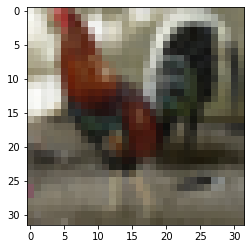

In [4]:
# one random image from x_train
#0부터 49999까지 수 중에 하나 랜덤으로 추출
img_index = random.randint(0,x_train.shape[0]-1)

# label idx
# 해당 데이터의 index 추출
label_index = y_train[img_index][0]

# showing
print("y=", str(label_index), "|", cifar10_labels[label_index])
plt.imshow(x_train[img_index])



</br>

### Data Normalization

- 오차 최저점을 빠르게 찾기 위해서


In [5]:
# fitting data in similar scale
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print(x_train.astype('float32'))
print(x_train)

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [6]:
print("Number of train data : ", len(x_train))
print("Number of test data : ", len(x_test))

Number of train data :  50000
Number of test data :  10000




</br>

### Split data into Train/Validation/Test data sets
train data : data for training model </br>

validation data : data for hyperparameter tuning and validation </br>

test data : after all validation and training, at the last test 

In [7]:
# split train | validation
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# one-hot encoding in label
# only one dimension get value 1 and other dimension value 0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("x_train shape: ", x_train.shape )
print("y_train shape: ", y_train.shape )

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape:  (45000, 32, 32, 3)
y_train shape:  (45000, 10)
45000 train set
5000 validation set
10000 test set



</br>


### Modeling 
Conv2D() </br>
Pooling() </br>
Dropout() </br>

In [8]:
#케라스 순차형 모델
model = tf.keras.Sequential()

#strides= 이런식으로 stride 설정 가능 하지만 padding을 'same'으로 설정하면 stride는 자동으로 설정 됨
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten()) #fully connected layer

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

### 본인만의 모델을 설계해 보세요 ^^

- 첫 번째 conv2D 층의 경우 input_shape (32,32,3)을 꼭 지정해주세요
- [Conv2d] 층의 경우 filter와 kernel_size만 수정해서 추가

- [MaxPooling2D] 층의 경우 2로만 5개 층 이하로 사용

- [Dropout] 층의 경우 웬만하면 0.5 이하로 추가

- [Flatten] 층의 경우 Dense 층 전에 넣어주기

- [Dense] 층의 경우 맨마지막 10이 되도록
--------------------------------------------------------------

- keras layer에 대한 보충 설명 참고자료
- https://keras.io/ko/layers/convolutional/
- https://zereight.tistory.com/227
- https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/

In [9]:
model = tf.keras.Sequential()


model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=6, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Flatten()) #fully connected layer

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        147520    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)         

----------------------------------------------------------


</br>

### Model Compile
학습 프로세스 구성</br>
optimizer, loss function, metrics 

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(lr=0.001),
              metrics = ['accuracy']) # 평가 기준 



</br>

### Model Training
ModelCheckpoint API로 epoch마다 모델 저장 

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'model.weights.best.hdf5', verbose = 1, save_best_only=True) # verbose 1 : seeing progress 

model.fit(x_train,
          y_train,
          batch_size=64,
          epochs=10,
          validation_data=(x_valid,y_valid),
          callbacks=[checkpointer])

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
44992/45000 [============================>.] - ETA: 0s - loss: 1.9486 - accuracy: 0.2465
Epoch 00001: val_loss improved from inf to 1.77970, saving model to model.weights.best.hdf5
45000/45000 [==============================] - 168s 4ms/sample - loss: 1.9486 - accuracy: 0.2465 - val_loss: 1.7797 - val_accuracy: 0.3298
Epoch 2/10
44992/45000 [============================>.] - ETA: 0s - loss: 1.6538 - accuracy: 0.3627
Epoch 00002: val_loss improved from 1.77970 to 1.52138, saving model to model.weights.best.hdf5
45000/45000 [==============================] - 165s 4ms/sample - loss: 1.6538 - accuracy: 0.3626 - val_loss: 1.5214 - val_accuracy: 0.4360
Epoch 3/10
44992/45000 [============================>.] - ETA: 0s - loss: 1.5353 - accuracy: 0.4195
Epoch 00003: val_loss improved from 1.52138 to 1.39340, saving model to model.weights.best.hdf5
45000/45000 [==============================] - 163s 4ms/sample - loss: 1.5353 - accuracy:

### Model Test

In [12]:
# get the best valid weight
model.load_weights('model.weights.best.hdf5') 


# Test Accuracy
score = model.evaluate(x_test, y_test, verbose=1)

print("Test Accuracy: ", score[1])  # [0] : test loss, [1] : accuracy

10000/10000 [==============================] - 8s 792us/sample - loss: 1.1166 - accuracy: 0.6010
Test Accuracy:  0.601




</br>

### Visualize Prediction

#### np.random.choice(a, size=None, replace=True, p=None)
- a : 데이터를 넣어주면 된다. 배열이면 원래의 데이터, 정수이면 range(a) 명령으로 데이터 생성
- size : 정수. 샘플 숫자 shape으로 넣으면 매트릭스를 생성
- replace : 중복의 허용 여부. 불리언. True이면 한번 선택한 데이터를 다시 선택 가능
- p : 배열. 각 데이터가 선택될 수 있는 확률

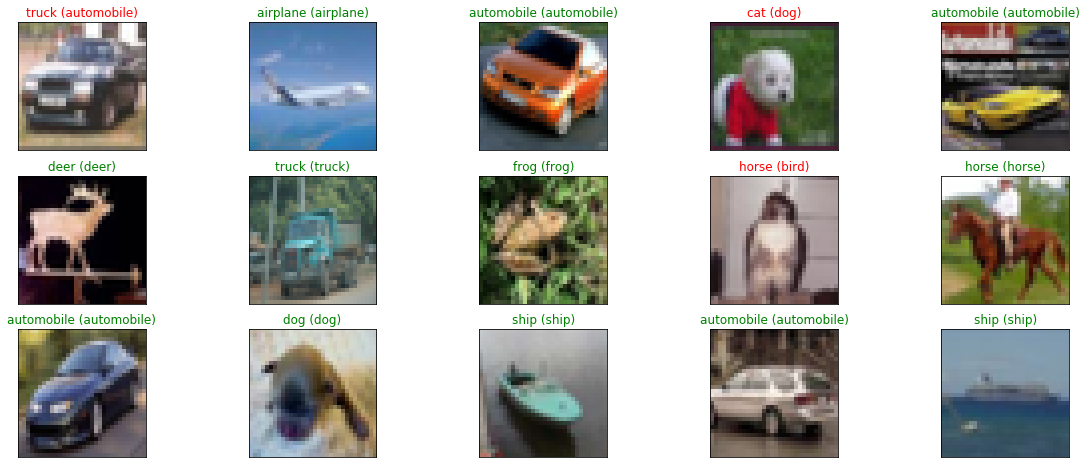

In [13]:
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(20,8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    axis = figure.add_subplot(3,5, i+1, xticks=[], yticks=[])
    #axis.imshow(np.squeeze(x_test[index])) 혹시나 4차원일까봐 3차원으로 차원을 감소
    axis.imshow(x_test[index])
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    
    axis.set_title("{} ({})".format(cifar10_labels[predict_index],
                                   cifar10_labels[true_index]),
                                   color = ("green" if predict_index == true_index else "red"))

- matplotlib.figure 참고
- https://m.blog.naver.com/PostView.nhn?blogId=jung2381187&logNo=220408468960&proxyReferer=https%3A%2F%2Fwww.google.com%2F